In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

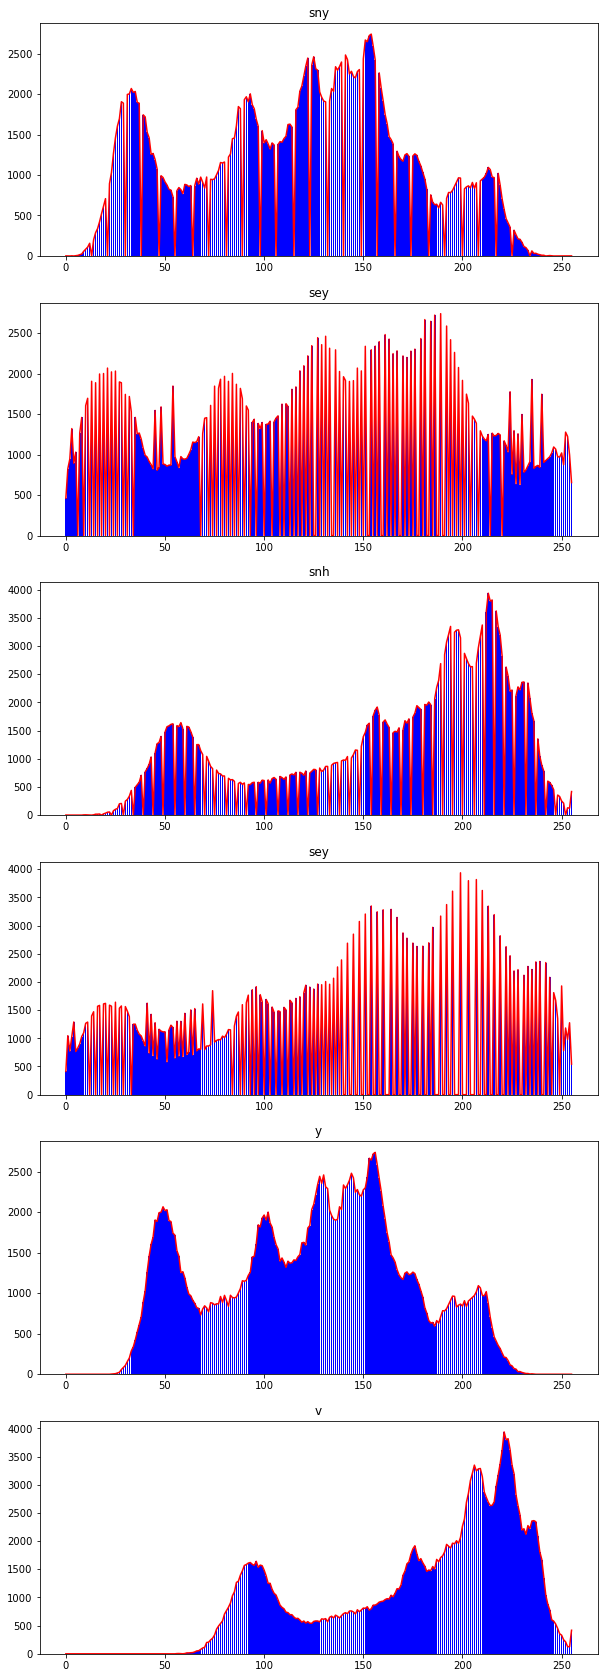

In [2]:
src = cv2.imread('./lena.jpg')
ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

y, cr,cb = cv2.split(ycrcb)
h, s, v = cv2.split(hsv)

sny = cv2.normalize(y, None, 0, 255, cv2.NORM_MINMAX)
sey = cv2.equalizeHist(y)
snh = cv2.normalize(v, None, 0, 255, cv2.NORM_MINMAX)
seh = cv2.equalizeHist(v)


# hist1 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist1 = cv2.calcHist(images=[sny], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist2 = cv2.calcHist(images=[sey], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist3 = cv2.calcHist(images=[snh], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist4 = cv2.calcHist(images=[seh], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist5 = cv2.calcHist(images=[y], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist6 = cv2.calcHist(images=[v], channels=[0], mask=None, histSize=[256], ranges=[0,256])

snyf = hist1.flatten()
seyf = hist2.flatten()
snhf = hist3.flatten()
sehf = hist4.flatten()
yf = hist5.flatten()
vf = hist6.flatten()
fig = plt.figure(figsize=(10,30))


fig.add_subplot(6,1,1)
plt.bar(np.arange(256), snyf, color='blue')
plt.title('sny')
plt.plot(snyf, c='r')

fig.add_subplot(6,1,2)
plt.bar(np.arange(256), seyf, color='blue')
plt.title('sey')
plt.plot(seyf, c='r')

fig.add_subplot(6,1,3)
plt.bar(np.arange(256), snhf, color='blue')
plt.title('snh')
plt.plot(snhf, c='r')

fig.add_subplot(6,1,4)
plt.bar(np.arange(256), sehf, color='blue')
plt.title('sey')
plt.plot(sehf, c='r')

fig.add_subplot(6,1,5)
plt.bar(np.arange(256), yf.flatten(), color='blue')
plt.title('y')
plt.plot(yf, c='r')

fig.add_subplot(6,1,6)
plt.bar(np.arange(256), vf.flatten(), color='blue')
plt.title('v')
plt.plot(vf, c='r')



plt.show()


dst_ny = cv2.merge([sny, cr, cb])
dst_ey = cv2.merge([sey, cr, cb])
dst_nh = cv2.merge([h, s, snh])
dst_eh = cv2.merge([h, s, seh])

dst_ny2b = cv2.cvtColor(dst_ny, cv2.COLOR_YCrCb2BGR)
dst_ey2b = cv2.cvtColor(dst_ey, cv2.COLOR_YCrCb2BGR)
dst_nh2b = cv2.cvtColor(dst_nh, cv2.COLOR_HSV2BGR)
dst_eh2b = cv2.cvtColor(dst_eh, cv2.COLOR_HSV2BGR)


cv2.imshow('src', src)
cv2.imshow('hsv', hsv)
cv2.imshow('ycrcb', ycrcb)
cv2.imshow('dst_ny2b', dst_ny2b)
cv2.imshow('dst_ey2b', dst_ey2b)
cv2.imshow('dst_nh2b', dst_nh2b)
cv2.imshow('dst_eh2b', dst_eh2b)

cv2.waitKey()
cv2.destroyAllWindows()

In [11]:
src = src = cv2.imread('./baboon.jpg', cv2.COLOR_BGR2HSV)
dst = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)
cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [35]:
src = cv2.imread('./baboon.jpg')
ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
y, cr,cb = cv2.split(ycrcb)
h, s, v = cv2.split(hsv)


array([[160,  71,  57, ..., 127, 164, 195],
       [131, 123,  60, ..., 143, 156, 136],
       [ 97, 127,  59, ..., 108,  97,  94],
       ...,
       [154, 154, 162, ...,  87,  98,  84],
       [163, 152, 135, ...,  89,  89,  82],
       [ 24,  27,  53, ...,   7,  14,   8]], dtype=uint8)

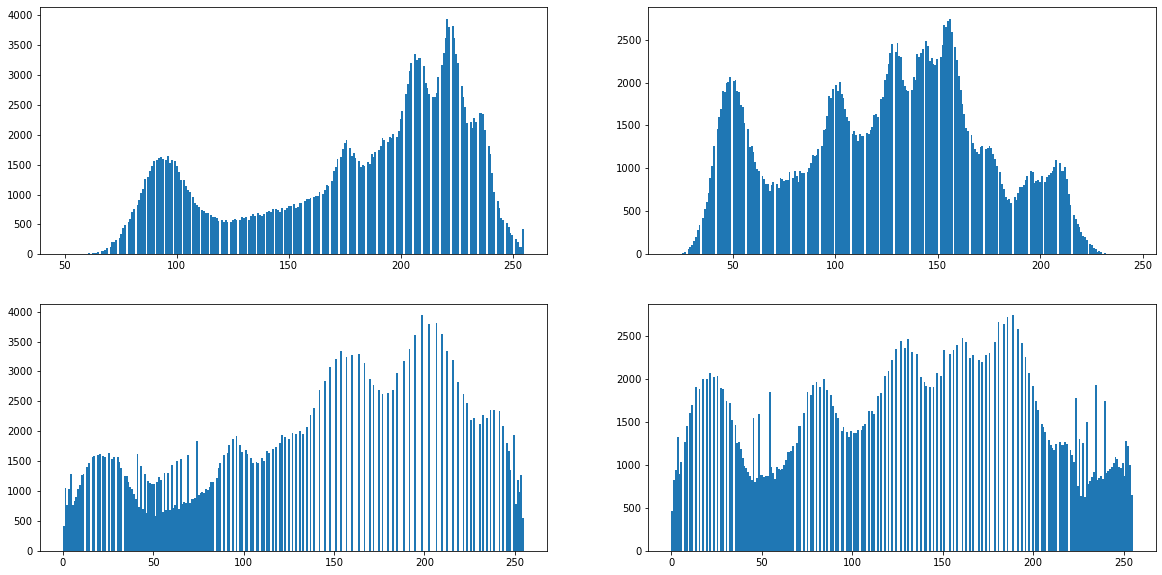

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
src = cv2.imread('./lena.jpg')
# 영상을 hsv로 변환, v가 명도
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
# split으로 h, s, v 나누기
h, s, v = cv2.split(hsv)
y, cr, cb = cv2.split(ycrcb)
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.hist(v.flatten(), bins=256)
ax2.hist(y.flatten(), bins=256)
# 명도(v)만 히스토그램 equalization
v2 = cv2.equalizeHist(v)
y2 = cv2.equalizeHist(y)
ax3.hist(v2.flatten(), bins=256)
ax4.hist(y2.flatten(), bins=256)
# merge로 h, s, v 결합
hsv2 = cv2.merge([h, s, v2])
ycrcb2 = cv2.merge([y2, cr, cb])
# BGR로 변환 (같은 방식으로 ycrcb 진행)
dst = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)
dst2 = cv2.cvtColor(ycrcb2, cv2.COLOR_YCrCb2BGR)
plt.show()
cv2.imshow('src', src)
cv2.imshow('hsv', dst)
cv2.imshow('ycc', dst2)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

In [13]:
src = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=np.uint8)

cv2.imshow('src', src)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [14]:
src = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=np.uint8)
print(cv2.boxFilter(src, 0, (3,3), src, (1,1),False, cv2.BORDER_CONSTANT))
src = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=np.uint8)
print(cv2.boxFilter(src, 0, (3,3), src, (1,1),False, cv2.BORDER_REPLICATE))
src = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=np.uint8)
print(cv2.boxFilter(src, 0, (3,3), src, (1,1),False, cv2.BORDER_REFLECT))
src = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=np.uint8)
print(cv2.boxFilter(src, 0, (3,3), src, (1,1),False, cv2.BORDER_REFLECT101))

[[12 21 16]
 [27 45 33]
 [24 39 28]]
[[21 27 33]
 [39 45 51]
 [57 63 69]]
[[21 27 33]
 [39 45 51]
 [57 63 69]]
[[33 36 39]
 [42 45 48]
 [51 54 57]]


In [16]:
src = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=np.uint8)
print(cv2.blur(src,(3,3),src, (1,1), cv2.BORDER_CONSTANT))
src = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=np.uint8)
print(cv2.blur(src,(3,3),src, (1,1), cv2.BORDER_REPLICATE))
src = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=np.uint8)
print(cv2.blur(src,(3,3),src, (1,1), cv2.BORDER_REFLECT))
src = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=np.uint8)
print(cv2.blur(src,(3,3),src, (1,1), cv2.BORDER_REFLECT_101))

[[1 2 2]
 [3 5 4]
 [3 4 3]]
[[2 3 4]
 [4 5 6]
 [6 7 8]]
[[2 3 4]
 [4 5 6]
 [6 7 8]]
[[4 4 4]
 [5 5 5]
 [6 6 6]]


In [17]:
src = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=np.uint8)
cv2.GaussianBlur(src, (3,3), 1)

array([[3, 4, 4],
       [5, 5, 5],
       [6, 6, 7]], dtype=uint8)

In [23]:
src = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=np.uint8)
print(src.shape)
print(src)

(3, 3)
[[1 2 3]
 [4 5 6]
 [7 8 9]]


border constant

In [21]:
src1 = np.array([[0,0,0,0,0],
                 [0,1,2,3,0],
                 [0,4,5,6,0],
                 [0,7,8,9,0],
                 [0,0,0,0,0]], dtype=np.uint8)
dst1 = round(np.mean(src1[:3][:3]))
dst1

1

In [38]:
src = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=np.uint8)
src1 = np.array([[0,0,0,0,0],
                 [0,1,2,3,0],
                 [0,4,5,6,0],
                 [0,7,8,9,0],
                 [0,0,0,0,0]], dtype=np.uint8)

dst1 = np.zeros(shape=(3,3))
for i in range(3):
    for j in range(3):
        dst1[i,j] = round(np.mean(src1[i:i+3, j:j+3]))
print(np.uint8(dst1))

print(cv2.boxFilter(src, ddepth=-1, ksize=(3,3), borderType=cv2.BORDER_CONSTANT))
print(cv2.blur(src, ksize=(3,3), borderType=cv2.BORDER_CONSTANT))

[[1 2 2]
 [3 5 4]
 [3 4 3]]
[[1 2 2]
 [3 5 4]
 [3 4 3]]
[[1 2 2]
 [3 5 4]
 [3 4 3]]


border replicate

In [37]:
src = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=np.uint8)
src2 = np.array([[1,1,2,3,3],
                 [1,1,2,3,3],
                 [4,4,5,6,6],
                 [7,7,8,9,9],
                 [7,7,8,9,9]], dtype=np.uint8)

dst2 = np.zeros(shape=(3,3))
for i in range(3):
    for j in range(3):
        dst2[i,j] = round(np.mean(src2[i:i+3, j:j+3]))
print(np.uint8(dst2))

print(cv2.boxFilter(src, ddepth=-1, ksize=(3,3), borderType=cv2.BORDER_REPLICATE))
print(cv2.blur(src, ksize=(3,3), borderType=cv2.BORDER_REPLICATE))

[[2 3 4]
 [4 5 6]
 [6 7 8]]
[[2 3 4]
 [4 5 6]
 [6 7 8]]
[[2 3 4]
 [4 5 6]
 [6 7 8]]


border reflect_101

In [39]:
src = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=np.uint8)
src3 = np.array([[5,4,5,6,5],
                 [2,1,2,3,2],
                 [5,4,5,6,5],
                 [8,7,8,9,8],
                 [5,4,5,6,5]], dtype=np.uint8)
                  
dst3 = np.zeros(shape=(3,3))
for i in range(3):
    for j in range(3):
        dst3[i,j] = round(np.mean(src3[i:i+3, j:j+3]))
print(np.uint8(dst3))

print(cv2.boxFilter(src, ddepth=-1, ksize=(3,3), borderType=cv2.BORDER_REFLECT_101))
print(cv2.blur(src, ksize=(3,3), borderType=cv2.BORDER_REFLECT_101))

[[4 4 4]
 [5 5 5]
 [6 6 6]]
[[4 4 4]
 [5 5 5]
 [6 6 6]]
[[4 4 4]
 [5 5 5]
 [6 6 6]]


border reflect

In [40]:
src = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=np.uint8)
src4 = np.array([[1,1,2,3,3],
                 [1,1,2,3,3],
                 [4,4,5,6,6],
                 [7,7,8,9,9],
                 [7,7,8,9,9]], dtype=np.uint8)

dst4 = np.zeros(shape=(3,3))
for i in range(3):
    for j in range(3):
        dst4[i,j] = round(np.mean(src4[i:i+3, j:j+3]))
print(np.uint8(dst4))

print(cv2.boxFilter(src, ddepth=-1, ksize=(3,3), borderType=cv2.BORDER_REFLECT))
print(cv2.blur(src, ksize=(3,3), borderType=cv2.BORDER_REFLECT))
# border reflect의 경우 지금당장 SRC어레이가 옆칸이 한칸 밖에 안되기 떄문에 border replicate와 똑같은 값이 나올 수 밖에 없음

[[2 3 4]
 [4 5 6]
 [6 7 8]]
[[2 3 4]
 [4 5 6]
 [6 7 8]]
[[2 3 4]
 [4 5 6]
 [6 7 8]]


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

src = cv2.imread('./lena.jpg')
dst_con3 = cv2.boxFilter(src, ddepth=-1, ksize=(3,3), borderType=cv2.BORDER_CONSTANT)
dst_con7 = cv2.boxFilter(src, ddepth=-1, ksize=(7,7), borderType=cv2.BORDER_CONSTANT)
dst_rep3 = cv2.boxFilter(src, ddepth=-1, ksize=(3,3), borderType=cv2.BORDER_REPLICATE)
dst_rep7 = cv2.boxFilter(src, ddepth=-1, ksize=(7,7), borderType=cv2.BORDER_REPLICATE)
dst_ref3 = cv2.boxFilter(src, ddepth=-1, ksize=(3,3), borderType=cv2.BORDER_REFLECT)
dst_ref7 = cv2.boxFilter(src, ddepth=-1, ksize=(7,7), borderType=cv2.BORDER_REFLECT)
dst_ref13 = cv2.boxFilter(src, ddepth=-1, ksize=(3,3), borderType=cv2.BORDER_REFLECT_101)
dst_ref17 = cv2.boxFilter(src, ddepth=-1, ksize=(7,7), borderType=cv2.BORDER_REFLECT_101)

print(dst_con3.shape)
print(dst_con7.shape)
print(dst_rep3.shape)
print(dst_rep7.shape)
print(dst_ref3.shape)
print(dst_ref7.shape)
print(dst_ref13.shape)
print(dst_ref17.shape)



cv2.imshow('src', src)
cv2.imshow('dst_con3', dst_con3)
cv2.imshow('dst_con7', dst_con7)
cv2.imshow('dst_rep3', dst_rep3)
cv2.imshow('dst_rep7', dst_rep7)
cv2.imshow('dst_ref3', dst_ref3)
cv2.imshow('dst_ref7', dst_ref7)
cv2.imshow('dst_ref13', dst_ref13)
cv2.imshow('dst_ref17', dst_ref17)


cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


-1

In [4]:
#커널 사이즈를 올리면 더 뿌옇게 나옴


src = cv2.imread('./lena.jpg')
dst_con = cv2.boxFilter(src, ddepth=-1, ksize=(11,11), borderType=cv2.BORDER_CONSTANT)
dst_rep = cv2.boxFilter(src, ddepth=-1, ksize=(11,11), borderType=cv2.BORDER_REPLICATE)
dst_ref = cv2.boxFilter(src, ddepth=-1, ksize=(11,11), borderType=cv2.BORDER_REFLECT)
dst_ref1 = cv2.boxFilter(src, ddepth=-1, ksize=(11,11), borderType=cv2.BORDER_REFLECT_101)

cv2.imshow('src', src)
cv2.imshow('dst_con', dst_con)
cv2.imshow('dst_rep', dst_rep)
cv2.imshow('dst_ref', dst_ref)
cv2.imshow('dst_ref1', dst_ref1)


cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

src = cv2.imread('./lena.jpg',0)
dst_con3 = cv2.boxFilter(src, ddepth=-1, ksize=(3,3), borderType=cv2.BORDER_CONSTANT)
dst_con7 = cv2.boxFilter(src, ddepth=-1, ksize=(7,7), borderType=cv2.BORDER_CONSTANT)
dst_rep3 = cv2.boxFilter(src, ddepth=-1, ksize=(3,3), borderType=cv2.BORDER_REPLICATE)
dst_rep7 = cv2.boxFilter(src, ddepth=-1, ksize=(7,7), borderType=cv2.BORDER_REPLICATE)
dst_ref3 = cv2.boxFilter(src, ddepth=-1, ksize=(3,3), borderType=cv2.BORDER_REFLECT)
dst_ref7 = cv2.boxFilter(src, ddepth=-1, ksize=(7,7), borderType=cv2.BORDER_REFLECT)
dst_ref13 = cv2.boxFilter(src, ddepth=-1, ksize=(3,3), borderType=cv2.BORDER_REFLECT_101)
dst_ref17 = cv2.boxFilter(src, ddepth=-1, ksize=(7,7), borderType=cv2.BORDER_REFLECT_101)

print(dst_con3.shape)
print(dst_con7.shape)
print(dst_rep3.shape)
print(dst_rep7.shape)
print(dst_ref3.shape)
print(dst_ref7.shape)
print(dst_ref13.shape)
print(dst_ref17.shape)



cv2.imshow('src', src)
cv2.imshow('dst_con3', dst_con3)
cv2.imshow('dst_con7', dst_con7)
cv2.imshow('dst_rep3', dst_rep3)
cv2.imshow('dst_rep7', dst_rep7)
cv2.imshow('dst_ref3', dst_ref3)
cv2.imshow('dst_ref7', dst_ref7)
cv2.imshow('dst_ref13', dst_ref13)
cv2.imshow('dst_ref17', dst_ref17)


cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)


-1

In [9]:
# ddepth값은 별 영향을 안미치는 듯 싶다

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

src = cv2.imread('./lena.jpg')
dst_con3 = cv2.boxFilter(src, ddepth=10000, ksize=(3,3), borderType=cv2.BORDER_CONSTANT)
dst_con7 = cv2.boxFilter(src, ddepth=10000, ksize=(7,7), borderType=cv2.BORDER_CONSTANT)
dst_rep3 = cv2.boxFilter(src, ddepth=10000, ksize=(3,3), borderType=cv2.BORDER_REPLICATE)
dst_rep7 = cv2.boxFilter(src, ddepth=10000, ksize=(7,7), borderType=cv2.BORDER_REPLICATE)
dst_ref3 = cv2.boxFilter(src, ddepth=10000, ksize=(3,3), borderType=cv2.BORDER_REFLECT)
dst_ref7 = cv2.boxFilter(src, ddepth=10000, ksize=(7,7), borderType=cv2.BORDER_REFLECT)
dst_ref13 = cv2.boxFilter(src, ddepth=10000, ksize=(3,3), borderType=cv2.BORDER_REFLECT_101)
dst_ref17 = cv2.boxFilter(src, ddepth=10000, ksize=(7,7), borderType=cv2.BORDER_REFLECT_101)

print(dst_con3.shape)
print(dst_con7.shape)
print(dst_rep3.shape)
print(dst_rep7.shape)
print(dst_ref3.shape)
print(dst_ref7.shape)
print(dst_ref13.shape)
print(dst_ref17.shape)



cv2.imshow('src', src)
cv2.imshow('dst_con3', dst_con3)
cv2.imshow('dst_con7', dst_con7)
cv2.imshow('dst_rep3', dst_rep3)
cv2.imshow('dst_rep7', dst_rep7)
cv2.imshow('dst_ref3', dst_ref3)
cv2.imshow('dst_ref7', dst_ref7)
cv2.imshow('dst_ref13', dst_ref13)
cv2.imshow('dst_ref17', dst_ref17)


cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


-1

In [18]:
src = cv2.imread('./lena.jpg')

dst1 = cv2.GaussianBlur(src, ksize=(3,3), sigmaX=0.0, borderType=cv2.BORDER_CONSTANT)


dst3 = cv2.GaussianBlur(src, ksize=(3,3), sigmaX=10.0, borderType=cv2.BORDER_CONSTANT)


dst5 = cv2.GaussianBlur(src, ksize=(3,3), sigmaX=1.0, sigmaY=10.0, borderType=cv2.BORDER_CONSTANT)


dstb = cv2.blur(src, ksize=(3,3), borderType=cv2.BORDER_CONSTANT)

cv2.imshow('src', src)
cv2.imshow('dst1',dst1)

cv2.imshow('dst3',dst3)

cv2.imshow('dst5',dst5)

cv2.imshow('dstb',dstb)
cv2.waitKey()
cv2.destroyAllWindows()


-1

In [19]:
src = cv2.imread('./lena.jpg', cv2.IMREAD_GRAYSCALE)
dst_blur = cv2.blur(src, ksize=(3,3), borderType=cv2.BORDER_CONSTANT)
dst_gau = cv2.GaussianBlur(src, ksize=(3,3), sigmaX=0.0, borderType=cv2.BORDER_CONSTANT)
dst_bil = cv2.bilateralFilter(src,-1, 10, 5)
cv2.imshow('src', src)
cv2.imshow('dst_blur', dst_blur)
cv2.imshow('dst_gau', dst_gau)
cv2.imshow('dst_bil', dst_bil)
cv2.waitKey()
cv2.destroyAllWindows()

In [20]:
src = cv2.imread('./lena.jpg', cv2.IMREAD_GRAYSCALE)
dst1 = cv2.bilateralFilter(src,d=1, sigmaColor = 10, sigmaSpace=10)
dst2 = cv2.bilateralFilter(src,d=11, sigmaColor = 10, sigmaSpace=10)
dst3 = cv2.bilateralFilter(src,d=151, sigmaColor = 10, sigmaSpace=10)
dst4 = cv2.bilateralFilter(src,d=1, sigmaColor = 1, sigmaSpace=1)
dst5 = cv2.bilateralFilter(src,d=11, sigmaColor = 1, sigmaSpace=1)
dst6 = cv2.bilateralFilter(src,d=151, sigmaColor = 1, sigmaSpace=1)
dst7 = cv2.bilateralFilter(src,d=1, sigmaColor = 1, sigmaSpace=10)
dst8 = cv2.bilateralFilter(src,d=11, sigmaColor = 1, sigmaSpace=10)
dst9 = cv2.bilateralFilter(src,d=151, sigmaColor = 1, sigmaSpace=10)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.imshow('dst4', dst4)
cv2.imshow('dst5', dst5)
cv2.imshow('dst6', dst6)
cv2.imshow('dst7', dst7)
cv2.imshow('dst8', dst8)
cv2.imshow('dst9', dst9)
cv2.waitKey()
cv2.destroyAllWindows()

In [29]:
src = cv2.imread('./lena.jpg', cv2.IMREAD_GRAYSCALE)
dst_blur = cv2.blur(src, ksize=(3,3), borderType=cv2.BORDER_CONSTANT)
dst_gau = cv2.GaussianBlur(src, ksize=(3,3), sigmaX=0.0, borderType=cv2.BORDER_CONSTANT)
dst_bil = cv2.bilateralFilter(src,-1, 10, 5)
dst_med3 = cv2.medianBlur(src, ksize=3)
dst_med7 = cv2.medianBlur(src, ksize=7)
dst_med11 = cv2.medianBlur(src, ksize=11)

cv2.
cv2.imshow('dst_blur', dst_blur)
cv2.imshow('dst_gau', dst_gau)
cv2.imshow('dst_bil', dst_bil)
cv2.imshow('dst_med3', dst_med3)
cv2.imshow('dst_med7', dst_med7)
cv2.imshow('dst_med11', dst_med11)
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

src = cv2.imread('./salt and pepper pattern.png')
dst = cv2.medianBlur(src, ksize=15)


cv2.imshow('salt and pepper', src)
cv2.imshow('dst_med', dst)
cv2.imwrite('./median salt.jpg', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

src = cv2.imread('./saltTEMPLE.png')
dst = cv2.medianBlur(src, ksize=7)


cv2.imshow('salt TEMPLE', src)
cv2.imshow('dst_med', dst)
cv2.imwrite('./median salt TEMPLE.jpg', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [27]:
img = np.zeros(shape=(512,512), dtype= np.uint8) +255

pt1 = 200, 200 # 첫번째 점의 좌표 생성
pt2 = 300, 300 # 두번째 점의 좌표 생성

src = cv2.rectangle(img, pt1, pt2, (0,0,0), -1)

gx = cv2.Sobel(src, -1, 1, 0, ksize=3) # ddepth가 -1이면 알아서 자동으로 맞춰줌 값이 -로 나오면 0으로 치환
gy = cv2.Sobel(src, -1, 0, 1, ksize=3) 

gx21 = cv2.Sobel(src, -1, 1, 0, ksize=21)
gy21 = cv2.Sobel(src, -1, 0, 1, ksize=21)

gxdd = cv2.Sobel(src, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)
gydd = cv2.Sobel(src, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)

gxdda = np.abs(gxdd) # 원본값을 절대값을 해줌
gydda = np.abs(gydd)  # 원본값을 절대값을 해줌
print(gx[195:205, 195:205])
print(gx[295:305, 295:305])

print(gy[195:205, 195:205])
print(gy[295:305, 295:305])


print(gxdd[195:205, 195:205])
print(gxdd[295:305, 295:305])

print(gydd[195:205, 195:205])
print(gydd[295:305, 295:305])


cv2.imshow('src', src)
cv2.imshow('gx', gx) #줄이 하나마나 나오는 이유는 마이너스는 0으로 되기 때문
cv2.imshow('gy', gy)
cv2.imshow('gx21', gx21)
cv2.imshow('gy21', gy21)
cv2.imshow('gxdda', gxdda)
cv2.imshow('gydda', gydda)


cv2.waitKey()
cv2.destroyAllWindows()

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
[[  0   0   0   0   0 255 255   0   0   0]
 [  0   0   0   0   0 255 255   0   0   0]
 [  0   0   0   0   0 255 255   0   0   0]
 [  0   0   0   0   0 255 255   0   0   0]
 [  0   0   0   0   0 255 255   0   0   0]
 [  0   0   0   0   0 255 255   0   0   0]
 [  0   0   0   0   0 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0